# PivotPy

> A Python Processing Tool for Vasp Input/Output. A CLI is available in Powershell, see [Vasp2Visual](https://github.com/massgh/Vasp2Visual).

## Install
`pip install pivotpy`

## How to use
- [Read Function References](functions.md)
- See [Full Documentation](https://massgh.github.io/pivotpy/).
- For CLI, use [Vasp2Visual](https://github.com/massgh/Vasp2Visual).
- Run in Azure [![Run in Azure](https://notebooks.azure.com/launch.png)](https://testazurenotebooks-massaz.notebooks.azure.com/j/notebooks/index.ipynb)

# New: Ipywidgets-based GUI in Progress
See GIF here:
![GIF](./docs/images/widget.gif)

In [ ]:
#collapse_output
import pivotpy as pp
print(', '.join(pp.__all__))

Dic2Dot, read_asxml, exclude_kpts, get_ispin, get_summary, get_kpts, get_tdos, get_evals, get_bands_pro_set, get_dos_pro_set, get_structure, export_vasprun, load_export, make_dot_dict, dump_dict, get_file_size, interpolate_data, ps_to_py, ps_to_std, select_dirs, select_files, get_child_items, invert_color, printr, printg, printb, printy, printm, printc, EncodeFromNumpy, DecodeToNumpy, link_to_class, plot_bands, modify_axes, quick_bplot, add_text, add_legend, add_colorbar, create_rgb_lines, quick_rgb_lines, quick_color_lines, init_figure, select_pdos, collect_dos, quick_dos_lines, plt_to_html, get_rgb_data, rgb_to_plotly, plotly_to_html, plotly_rgb_lines, plotly_dos_lines, iplotfromtxt, save_mp_API, load_mp_data, get_crystal, get_poscar, trace_kpath, get_kmesh, intersect_3p_p_3v, centroid, order, in_vol_sector, out_bz_plane, to_xy, rad_angle, arctan_full, get_bz, plot_bz, show, savefig


In [ ]:
import os 
os.chdir('E:/Research/graphene_example/ISPIN_1/bands')
xml_data=pp.read_asxml()
vr=pp.export_vasprun(elim=[-5,5])
vr.keys()

dict_keys(['sys_info', 'dim_info', 'kpoints', 'kpath', 'bands', 'tdos', 'pro_bands', 'pro_dos', 'poscar', 'xml'])

In [ ]:
from pivotpy import vr_parser as vp
xml_data=vp.read_asxml()
vr=vp.export_vasprun(elim=[-5,5])
vr.keys()

dict_keys(['sys_info', 'dim_info', 'kpoints', 'kpath', 'bands', 'tdos', 'pro_bands', 'pro_dos', 'poscar', 'xml'])

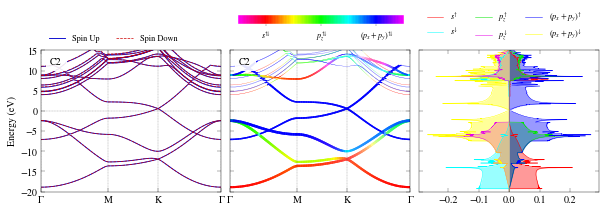

In [ ]:
#collapse_input
import pivotpy as pp 
import matplotlib.pyplot as plt 
vr1=pp.export_vasprun('E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml')
vr2=pp.export_vasprun('E:/Research/graphene_example/ISPIN_2/dos/vasprun.xml')
axs=pp.init_figure(ncols=3,widths=[1,1,1],sharey=True,wspace=0.05,figsize=(10,2.6))
elements=[0,0,[0,1]]
orbs=[[0],[1],[2,3]]
orblabels=['s','p_z','(p_x+p_y)']
colors=['r',(0,0.9,0),'b']
ti_cks=dict(xt_indices=[0,30,60,-1],xt_labels=['Γ','M','K','Γ'])
args_dict=dict(elements=elements,orbs=orbs,orblabels=orblabels,elim=[-20,15])
pp.quick_bplot(path_evr=vr1,ax=axs[0],**ti_cks,elim=[-20,15])
pp.quick_rgb_lines(path_evr=vr1,ax=axs[1],**args_dict,**ti_cks)
lg_k={'ncol': 3}
pp.quick_dos_lines(path_evr=vr2,ax=axs[2],vertical=True,include_dos='pdos',**args_dict,colors=colors,legend_kwargs=lg_k)
pp.add_colorbar(ax=plt.gcf().add_axes([0.399,1.02,0.23,0.05]),ticklabels=[r'$s^{⇅}$',r'$p_z^{⇅}$',r'$(p_x+p_y)^{⇅}$'])
pp.show() 

## Brillouin Zone (BZ) Processing
- Look in `pivotpy.sio` module for details on generating mesh and path of KPOINTS as well as using Materials Projects' API to get POSCAR right in the working folder with command `get_poscar`. Below is a screenshot of interactive BZ plot. You can `double click` on blue points and hit `Ctrl + C` to copy the high symmetry points relative to reciprocal lattice basis vectors. (You will be able to draw kpath in `Pivotpy-Dash` application and generate KPOINTS automatically from a web interface later on!). 
- Same color points lie on a sphere, with radius decreasing as red to blue and  gamma point in gold color. These color help distinguishing points but the points not always be equivalent, for example in FCC, there are two points on mid of edges connecting square-hexagon and hexagon-hexagon at equal distance from center but not the same points. 
- Any colored point's hover text is in gold background.

In [ ]:
from IPython.display import Image
Image(url="docs/images/plot_bz.jpg")

## Plotting Two Calculations Side by Side 
- Here we will use `shift_kpath` to demonstrate plot of two calculations on same axes side by side

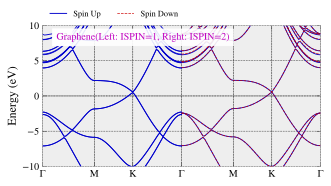

In [ ]:
#collapse_input
import matplotlib.pyplot as plt
import pivotpy as pp 
plt.style.use('bmh')
vr1=pp.export_vasprun('E:/Research/graphene_example/ISPIN_1/bands/vasprun.xml')
shift_kpath=vr1.kpath[-1] # Add last point from first export in second one.
vr2=pp.export_vasprun('E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml',shift_kpath=shift_kpath)
last_k=vr2.kpath[-1]
axs=pp.init_figure(figsize=(5,2.6))
K_all=[*vr1.kpath,*vr2.kpath] # Merge kpath for ticks
kticks=[K_all[i] for i in [0,30,60,90,120,150,-1]]
ti_cks=dict(xticks=kticks,xt_labels=['Γ','M','K','Γ','M','K','Γ'])
pp.quick_bplot(path_evr=vr1,ax=axs)
pp.quick_bplot(path_evr=vr2,ax=axs,txt='Graphene(Left: ISPIN=1, Right: ISPIN=2)',ctxt='m')
pp.modify_axes(ax=axs,xlim=[0,last_k],ylim=[-10,10],**ti_cks)

## Interpolation 

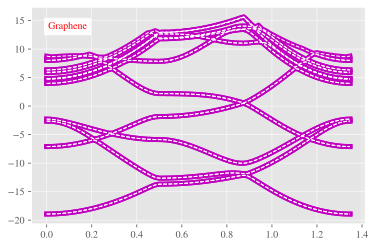

In [ ]:
#collapse_input
import pivotpy as pp
plt.style.use('ggplot')
k=vr1.kpath
ef=vr1.bands.E_Fermi
evals=vr1.bands.evals-ef
#Let's interpolate our graph to see effect. It is useful for colored graphs.
knew,enew=pp.interpolate_data(x=k,y=evals,n=10,k=3)
plot=plt.plot(k,evals,'m',lw=5,label='real data')
plot=plt.plot(k,evals,'w',lw=1,label='interpolated',ls='dashed')
pp.add_text(ax=plt.gca(),txts='Graphene')

## Running powershell commands from python.
Some tasks are very tideious in python while just a click way in powershell. See below, and try to list processes in python yourself to see the difference!

In [ ]:
pp.ps_to_std(ps_command='(Get-Process)[0..4]')

NPM(K)    PM(M)      WS(M)     CPU(s)      Id  SI ProcessName
------    -----      -----     ------      --  -- -----------
53    39.77      18.03     901.41   13988   1 AltC
38    40.05      33.10      45.00     792   1 ApplicationFrameHost
8     1.64       4.39       0.00    7532   0 AppVShNotify
8     1.88       4.60       0.09   18180   1 AppVShNotify
19     4.77       4.37       0.00    4992   0 armsvc


In [ ]:
#hide
#from nbdev.export import *
#notebook2script()

## Using Plotly in pivotpy
- See video!
<div><iframe width="560" height="315" src="https://www.youtube.com/embed/uda0ubF-cnQ" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></div>
- Interact with chart below, hover, zoom, pan and more!
<div><iframe width="700" height="400" frameborder="0" scrolling="no" src="//plotly.com/~massgh/36.embed"></iframe></div>